In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells
import matplotlib as plt

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
ad = sc.read_h5ad('/Users/mcgaugheyd/git/plaeApp/inst/example_analyses/scEiaD_all_anndata.fix01.h5ad')
#ad = sc.read_h5ad('/Users/mcgaugheyd/data/brooks/sc_mouse_OFC_e10_e11_e12/data_redo/bioc_dims8_hvg2000_subset1,2,3/assays.h5')

In [3]:
ad

AnnData object with n_obs × n_vars = 1154150 × 26678
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'batch', 'study_accession', 'Age', 'TechType', 'Barcode', 'UMAP_1', 'UMAP_2', 'S.Score', 'G2M.Score', 'Phase', 'cluster', 'subcluster', 'sample_accession', 'library_layout', 'organism', 'Platform', 'UMI', 'Tissue', 'Covariate', 'integration_group', 'TissueNote', 'Source', 'bam10x', 'Comment', 'biosample', 'Donor', 'Organ', 'sex', 'biosample_title', 'retina_region', 'CellType', 'SubCellType', 'TabulaMurisCellType', 'Paper', 'Method', 'Compartment', 'CellType_predict', 'CellType_predict_max_prob', 'TabulaMurisCellType_predict', 'TabulaMurisCellType_predict_max_prob', 'Doublet.Probability', 'Doublet', 'doublet_score_scran'
    var: 'name'
    obsm: 'X_scvi', 'X_scviumap'

In [4]:
#cut down to one sample
pd.set_option('display.max_rows', None)
ad.obs[['Tissue','sample_accession','organism']].value_counts()
sample_counts = ad[ad.obs['Tissue'].isin(['Retina'])].obs[['sample_accession']].value_counts()

In [5]:
sample_counts = ad[ad.obs['Tissue'].isin(['Retina'])].obs[['sample_accession']].value_counts(ascending = True)
sample_counts[sample_counts > 600].index.to_list()

[('SRS4715842',),
 ('SRS6424732',),
 ('EGAF00004257566',),
 ('SRS866909',),
 ('SRS7483324',),
 ('SRS4715840',),
 ('SRS7483331',),
 ('SRS5421627',),
 ('EGAF00004257561',),
 ('EGAF00004257553',),
 ('EGAF00004257559',),
 ('SRS3698233',),
 ('SRS6424737',),
 ('EGAF00004257568',),
 ('SRS6424745',),
 ('EGAF00004257573',),
 ('SRS866910',),
 ('SRS4715841',),
 ('EGAF00004257585',),
 ('SRS6424747',),
 ('SRX8047153',),
 ('SRS7483325',),
 ('SRX8651875',),
 ('EGAF00004257556',),
 ('SRX7423413',),
 ('SRS6424746',),
 ('EGAF00004257570',),
 ('EGAF00004257580',),
 ('EGAF00004257464',),
 ('EGAF00004257578',),
 ('EGAF00004257571',),
 ('ERS2852885',),
 ('EGAF00004257584',),
 ('EGAF00004257468',),
 ('EGAF00004257543',),
 ('EGAF00004257474',),
 ('EGAF00004257557',),
 ('EGAF00004257460',),
 ('EGAF00004257459',),
 ('SRS6424744',),
 ('EGAF00004257576',),
 ('SRS866912',),
 ('SRS3698228',),
 ('EGAF00004257471',),
 ('EGAF00004257461',),
 ('EGAF00004257548',),
 ('SRS3698219',),
 ('EGAF00004257572',),
 ('SRX8047161'

In [8]:
s_samples = sample_counts[sample_counts <= 600].index.to_list()

In [36]:
[str(sample)[2:len(sample)-4] for sample in s_samples]

['SRS3675364',
 'SRS4385763',
 'SRS4385765',
 'SRS4385766',
 'SRS4385768',
 'SRS3675843',
 'SRS3675813',
 'SRS3675787',
 'SRS3675773',
 'SRS3675771',
 'SRS3675763',
 'SRS3675753',
 'SRS3675749',
 'SRS3675748',
 'SRS3675740',
 'SRS3675735',
 'SRS3675733',
 'SRS3675729',
 'SRS3675726',
 'SRS3675725',
 'SRS3675712',
 'SRS3675694',
 'SRS3675689',
 'SRS3675688',
 'SRS4385762',
 'SRS4385761',
 'SRS4385760',
 'SRS4385759',
 'SRS4384997',
 'SRS4384996',
 'SRS4384994',
 'SRS4384991',
 'SRS4384990',
 'SRS4384989',
 'SRS4384987',
 'SRS4384986',
 'SRS4384985',
 'SRS4384984',
 'SRS4385738',
 'SRS3675678',
 'SRS4385739',
 'SRS4385743',
 'SRS4385744',
 'SRS4385747',
 'SRS4385749',
 'SRS4385750',
 'SRS4385751',
 'SRS4385752',
 'SRS4385753',
 'SRS4385755',
 'SRS4385757',
 'SRS4385758',
 'SRS4385740',
 'SRS4384998',
 'SRS3675676',
 'SRS3675663',
 'SRS3675548',
 'SRS3675547',
 'SRS3675546',
 'SRS3675545',
 'SRS3675544',
 'SRS3675543',
 'SRS3675542',
 'SRS3675541',
 'SRS3675539',
 'SRS3675538',
 'SRS36755

In [35]:
sample_counts

sample_accession
SRS3675364              1
SRS4385763              1
SRS4385765              1
SRS4385766              1
SRS4385768              1
SRS3675843              1
SRS3675813              1
SRS3675787              1
SRS3675773              1
SRS3675771              1
SRS3675763              1
SRS3675753              1
SRS3675749              1
SRS3675748              1
SRS3675740              1
SRS3675735              1
SRS3675733              1
SRS3675729              1
SRS3675726              1
SRS3675725              1
SRS3675712              1
SRS3675694              1
SRS3675689              1
SRS3675688              1
SRS4385762              1
SRS4385761              1
SRS4385760              1
SRS4385759              1
SRS4384997              1
SRS4384996              1
SRS4384994              1
SRS4384991              1
SRS4384990              1
SRS4384989              1
SRS4384987              1
SRS4384986              1
SRS4384985              1
SRS4384984           

In [31]:
existing[0:6]

['EGAF00004257580.seacell_aggr.csv.gz',
 'EGAF00004257573.seacell_aggr.csv.gz',
 'SRS3698228.seacell_aggr.csv.gz',
 'SRS6424735.seacell_aggr.csv.gz',
 'SRS4036124.obs.csv.gz',
 'SRS5090837.obs.csv.gz']

In [13]:
ad.obs['Organ'].value_counts()

Organ
Eye                 939282
Brain                64671
Trachea              16687
Spleen               14050
Muscle               13467
Heart                11044
NA                   10365
Bladder              10293
Marrow                9881
Tongue                7681
Lymph.node            7376
Skin                  6825
Rectum                6010
Esophagus             5976
Mammary_Gland         5848
Lung                  5241
Stomach               5215
Liver                 3574
Thymus                3178
Small.intestine       2841
Common.bile.duct      2270
Blood                 1411
Kidney                 964
Name: count, dtype: int64

In [234]:
ad_sample = ad[ad.obs['sample_accession'].isin([sample])]

In [235]:
ad_sample

View of AnnData object with n_obs × n_vars = 611 × 26678
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'batch', 'study_accession', 'Age', 'TechType', 'Barcode', 'UMAP_1', 'UMAP_2', 'S.Score', 'G2M.Score', 'Phase', 'cluster', 'subcluster', 'sample_accession', 'library_layout', 'organism', 'Platform', 'UMI', 'Tissue', 'Covariate', 'integration_group', 'TissueNote', 'Source', 'bam10x', 'Comment', 'biosample', 'Donor', 'Organ', 'sex', 'biosample_title', 'retina_region', 'CellType', 'SubCellType', 'TabulaMurisCellType', 'Paper', 'Method', 'Compartment', 'CellType_predict', 'CellType_predict_max_prob', 'TabulaMurisCellType_predict', 'TabulaMurisCellType_predict_max_prob', 'Doublet.Probability', 'Doublet', 'doublet_score_scran'
    var: 'name'
    obsm: 'X_scvi', 'X_scviumap'

In [236]:
# Copy the counts to ".raw" attribute of the anndata since it is necessary for downstream analysis
# This step should be performed after filtering 
raw_ad = sc.AnnData(ad_sample.X)
raw_ad.obs_names, raw_ad.var_names = ad_sample.obs_names, ad_sample.var_names
ad_sample.raw = raw_ad

In [237]:
# Normalize cells, log transform and compute highly variable genes
sc.pp.normalize_per_cell(ad_sample)
sc.pp.log1p(ad_sample)
sc.pp.highly_variable_genes(ad_sample, n_top_genes=1500)

In [238]:
# Compute principal components - 
sc.tl.pca(ad_sample, n_comps=20, use_highly_variable=True)

In [239]:
## Core parameters 
## want ~ 75 cells per meta
n_SEACells = int(ad_sample.shape[0] / 75)
build_kernel_on = 'X_pca' 
## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [240]:
model = SEACells.core.SEACells(ad_sample, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

Welcome to SEACells!


In [241]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/611 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/611 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/611 [00:00<?, ?it/s]

Constructing CSR matrix...


In [242]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...


IndexError: index 0 is out of bounds for axis 1 with size 0

Randomly initialized A matrix.
Setting convergence threshold at 0.00049
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

Converged after 24 iterations.


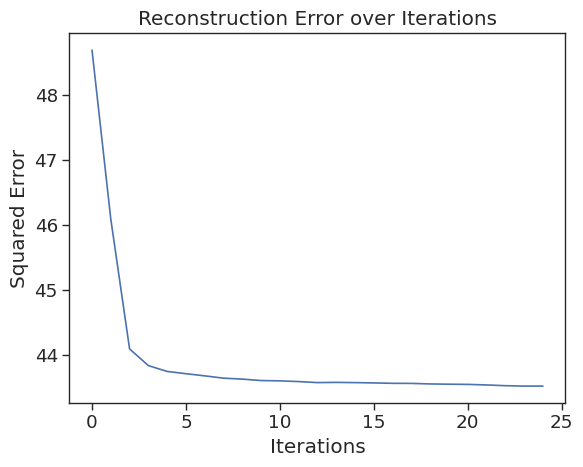

In [231]:
model.fit(min_iter=5, max_iter=200)
model.plot_convergence()

In [ ]:
ad_sample.obs['SEACell']
#model.get_hard_assignments()['SEACell']

index
AAACCTGAGATGTAAC_SRS3674974     SEACell-38
AAACCTGAGCCCAGCT_SRS3674974     SEACell-42
AAACCTGAGGCAATTA_SRS3674974     SEACell-16
AAACCTGAGTAGCGGT_SRS3674974    SEACell-130
AAACCTGAGTGGAGTC_SRS3674974     SEACell-78
AAACCTGCAAGTTGTC_SRS3674974    SEACell-110
AAACCTGCACCCATTC_SRS3674974     SEACell-60
AAACCTGCACGGATAG_SRS3674974     SEACell-96
AAACCTGCAGATCCAT_SRS3674974     SEACell-87
AAACCTGCAGTATGCT_SRS3674974     SEACell-53
AAACCTGCATTCCTCG_SRS3674974    SEACell-123
AAACCTGGTATCGCAT_SRS3674974     SEACell-39
AAACCTGGTCACCCAG_SRS3674974     SEACell-89
AAACCTGGTCCGACGT_SRS3674974     SEACell-71
AAACCTGGTGTCTGAT_SRS3674974     SEACell-62
AAACCTGGTTCACGGC_SRS3674974     SEACell-25
AAACCTGGTTGCGCAC_SRS3674974    SEACell-116
AAACCTGGTTGTCTTT_SRS3674974     SEACell-11
AAACCTGTCACGCGGT_SRS3674974      SEACell-3
AAACCTGTCGTCACGG_SRS3674974     SEACell-11
AAACCTGTCGTTTAGG_SRS3674974     SEACell-54
AAACCTGTCGTTTATC_SRS3674974      SEACell-9
AAACCTGTCTAACTTC_SRS3674974     SEACell-62
AAACC

In [131]:
[x for x in existing]

['SRS5090837.obs.csv.gz',
 'SRS3674975.seacell_aggr.csv.gz',
 'SRS3674974.seacell_aggr.csv.gz',
 'SRS5434855.seacell_aggr.csv.gz',
 'SRS3698223.obs.csv.gz',
 'SRS3674977.seacell_aggr.csv.gz',
 'SRX9537754.seacell_aggr.csv.gz',
 'SRS3674976.seacell_aggr.csv.gz',
 'SRS5434853.seacell_aggr.csv.gz',
 'SRX9537750.seacell_aggr.csv.gz',
 'SRS3674975.obs.csv.gz',
 'SRS5434853.obs.csv.gz',
 'SRS3698223.seacell_aggr.csv.gz',
 'SRS3698222.seacell_aggr.csv.gz',
 'SRX9537750.obs.csv.gz',
 'SRS4363762.obs.csv.gz',
 'SRS5090837.seacell_aggr.csv.gz',
 'SRS3674988.seacell_aggr.csv.gz',
 'SRS3674979.seacell_aggr.csv.gz',
 'SRS3674977.obs.csv.gz',
 'SRS3674988.obs.csv.gz',
 'SRS3674979.obs.csv.gz',
 'SRS3674974.obs.csv.gz',
 'SRS3698222.obs.csv.gz',
 'SRS5434860.obs.csv.gz',
 'SRX9537754.obs.csv.gz',
 'SRS5434860.seacell_aggr.csv.gz',
 'SRS3674976.obs.csv.gz',
 'SRS5434855.obs.csv.gz',
 'SRS4363762.seacell_aggr.csv.gz']

In [129]:
import os
existing = os.listdir('/Users/mcgaugheyd//data/eiad_seacells')

/var/folders/s4/y5f1tt296dj8088gvczcx11d4lrnr7/T/ipykernel_11483/2953622992.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera

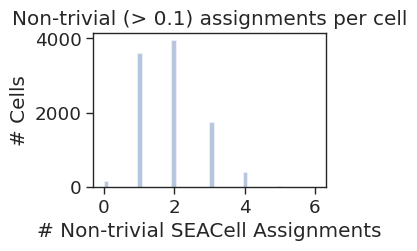

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

In [21]:
labels,weights = model.get_soft_assignments()

/opt/homebrew/Caskroom/mambaforge/base/envs/seacells/lib/python3.8/site-packages/SEACells/plot.py:121: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby('SEACell').count().iloc[:, 0], bins=bins)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


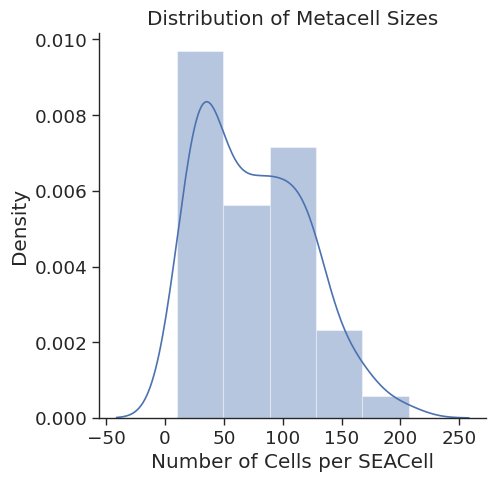

,size
SEACell,
SEACell-0,42
SEACell-1,64
SEACell-10,33
SEACell-100,92
SEACell-101,14
SEACell-102,83
SEACell-103,31
SEACell-104,16
SEACell-105,98


In [23]:
SEACells.plot.plot_SEACell_sizes(ad_sample, bins=5)

In [24]:
meta_aggr = SEACells.core.summarize_by_soft_SEACell(ad_sample, model.A_,summarize_layer='raw', minimum_weight=0.05)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [00:43<00:00,  2.99it/s]


In [25]:
meta_aggr_df = pd.DataFrame(meta_aggr.X.toarray())
meta_aggr_df.columns = meta_aggr.var_names
meta_aggr_df.index = sample + '__' + meta_aggr_df.index.astype('str')

In [34]:
pd.DataFrame(ad_sample.obs).to_csv('~/data/eiad_seacells/' + sample + '.obs.csv.gz')
meta_aggr_df.to_csv('~/data/eiad_seacells/' + sample + '.seacell_aggr.csv.gz')